# Data PreProcessing

In [23]:
# Feb 20th 2019 


# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 

# Set working directory
os.chdir('/Users/amandahutter/Documents/PythonCode/Udemy/MachineLearningA-Z/Part 4 - Clustering/Section 24 - K-Means Clustering') 
dataset = pd.read_csv("Mall_Customers.csv")
print(dataset.head())

# X is the independent variables, Annual Income + Spending Score 
X = dataset.iloc[:, [3, 4]].values
print(X)

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [

### We are doing a Clustering problem; this is unsupervised learning because we do not have training data to use to predict 

# Test for Optimal Number of Clusters 

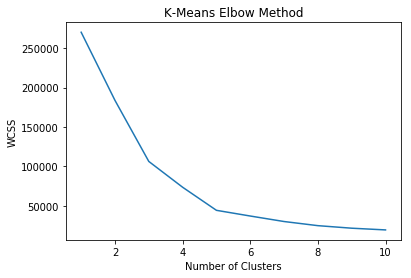

In [24]:
# Use elbow method to find optimal number of Clusters 
from sklearn.cluster import KMeans
wcss = [] 
# fit KMeans to our data X 
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    # compute WCSS and append to our list, also called 'Inertia' in KMeans class 
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## We will choose 5 clusters, based on the elbow method 

# Fit Mall Data to K-Means Clustering Algorithm

In [25]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_kmeans = kmeans.fit_predict(X)
print(Y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualize 

(200,)
(200, 2)


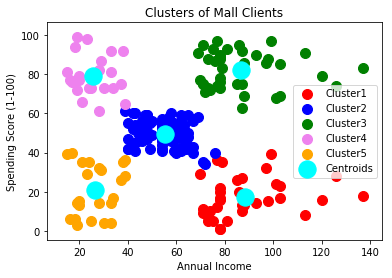

In [38]:
print(Y_kmeans.shape)
print(X.shape)
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100, color = 'red', label = 'Cluster1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, color = 'blue', label = 'Cluster2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, color = 'green', label = 'Cluster3')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s = 100, color = 'violet', label = 'Cluster4')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s = 100, color = 'orange', label = 'Cluster5')
# Add the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1], s = 300, color = 'cyan', label = 'Centroids')
plt.title('Clusters of Mall Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# ReName clusters 

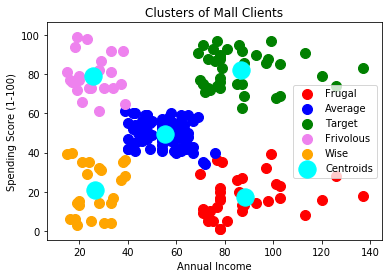

In [37]:
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100, color = 'red', label = 'Frugal')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, color = 'blue', label = 'Average')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, color = 'green', label = 'Target')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s = 100, color = 'violet', label = 'Frivolous')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s = 100, color = 'orange', label = 'Wise')
# Add the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1], s = 300, color = 'cyan', label = 'Centroids')
plt.title('Clusters of Mall Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()